## Implementing Logistic Regression Manually

#### Load necessary libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

#### Load the dataset

In [106]:
data = pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Visualize the dataset for better understanding

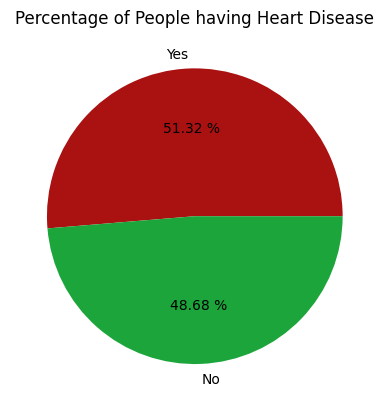

In [44]:
heart_disease_y = data.target.sum()
heart_disease_n = len(data) - heart_disease_y

plt.title("Percentage of People having Heart Disease")

plt.pie([heart_disease_y, heart_disease_n], labels = ['Yes', 'No'], colors = ['#AA1111', '#1CA53B'], autopct = '%.2f %%')

plt.show()

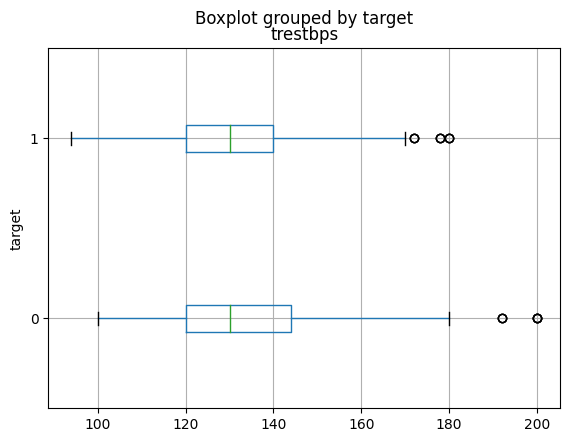

In [23]:
data.boxplot(column = 'trestbps', by = 'target', vert = False)

plt.show()

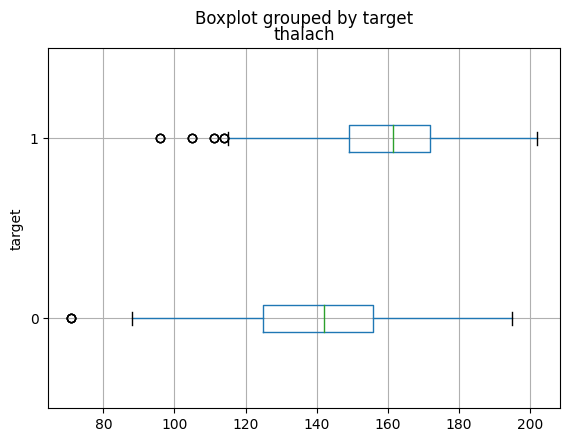

In [24]:
data.boxplot(column = 'thalach', by = 'target', vert = False)

plt.show()

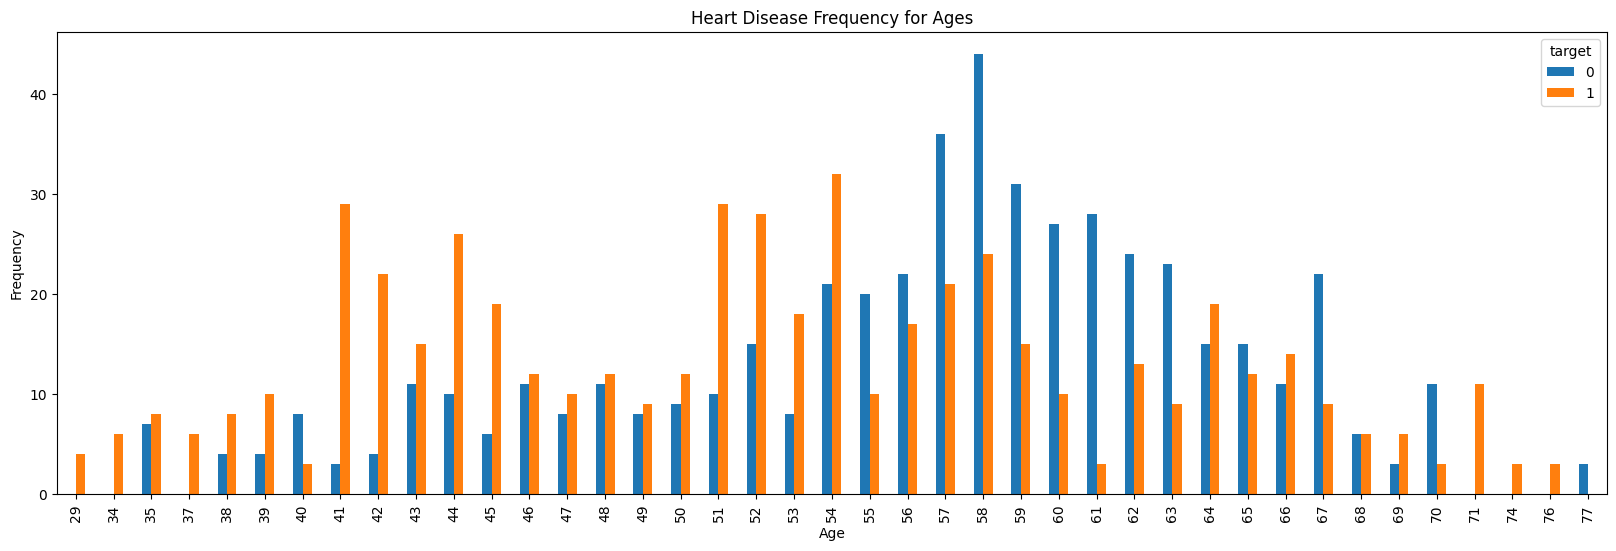

In [41]:
pd.crosstab(data.age, data.target).plot(kind = "bar", figsize = (20, 6))

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

### Find if there are null values in dataset

In [26]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***It seems that there are no null values in our dataset, so cleaning is not required***

### Performing Normalization of Dataset

In [107]:
data.groupby('target').mean()

# shuffle the dataset
data = data.sample(frac = 1)

##### Get the target values

In [108]:
y = data.target.values

##### Get the input features

In [109]:
x = data.drop(['target'], axis = 1)

<h3 style = "text-align: center; padding: 10px"> Min Max Scala </h3>

$$\begin{align*}
{x_i} &= \frac{x_i - x_{min}}{x_{max} - x_{min}}
\end{align*}$$

In [110]:
x = ((x - np.min(x)) / (np.max(x) - np.min(x))).values

In [111]:
print(x)

[[0.07624113 0.         0.         ... 0.00177305 0.         0.00531915]
 [0.08687943 0.00177305 0.00177305 ... 0.0035461  0.         0.0035461 ]
 [0.10815603 0.00177305 0.         ... 0.0035461  0.00177305 0.00531915]
 ...
 [0.05141844 0.00177305 0.00177305 ... 0.0035461  0.         0.0035461 ]
 [0.12056738 0.00177305 0.0035461  ... 0.0035461  0.00177305 0.00531915]
 [0.12056738 0.00177305 0.0035461  ... 0.00177305 0.         0.00531915]]


#### Separate Training and Testing dataset

In [113]:
train_size = int(0.8 * len(x))
test_size = len(x) - train_size

x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

x_train

array([[0.07624113, 0.        , 0.        , ..., 0.00177305, 0.        ,
        0.00531915],
       [0.08687943, 0.00177305, 0.00177305, ..., 0.0035461 , 0.        ,
        0.0035461 ],
       [0.10815603, 0.00177305, 0.        , ..., 0.0035461 , 0.00177305,
        0.00531915],
       ...,
       [0.09219858, 0.        , 0.0035461 , ..., 0.00177305, 0.        ,
        0.0035461 ],
       [0.09042553, 0.00177305, 0.        , ..., 0.0035461 , 0.        ,
        0.00531915],
       [0.09574468, 0.00177305, 0.        , ..., 0.00177305, 0.0035461 ,
        0.0035461 ]])

#### Define Sigmoid function

In [114]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

#### Define the cost function

$$loss(f(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f\left( \mathbf{x}^{(i)} \right) \right) $$

In [115]:
def compute_cost(x, y, w, b):
    cost = 0
    m = len(y)
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        y_hat = sigmoid(z_i)
        
        cost += -y[i] * np.log10(y_hat) + (1 - y[i]) * np.log10(1 - y_hat)
    
    cost = cost / m
    
    return cost

#### Compute Gradient

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

In [116]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0
    
    for i in range(m):
        f_i = sigmoid(np.dot(x[i], w) + b)
        err_i = f_i - y[i]
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i, j]
        
        dj_db = dj_db + err_i
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

#### Implement Gradient Descent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [117]:
def gradient_descent(x, y, w_in, b_in, alpha, epochs):
    
    cost_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(epochs):
        
        # calculate gradient and update parameters
        dj_db, dj_dw = compute_gradient(x, y, w, b)
        
        # update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost_history.append(compute_cost(x, y, w, b))
        
        # print cost after iterations
        if (i % math.ceil(epochs / 10)) == 0:
            print("Iteration", i, ": Cost", cost_history[-1])
            
    return w, b, cost_history

#### Run gradient descent on training set

In [132]:
# initialize the weights
w_tmp = np.zeros_like(x_train[0])
b_tmp = 0

alpha = 0.1
epochs = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alpha, epochs)

print("\nUpdated Parameters :\nw =", w_out, "\nb =", b_out)

Iteration 0 : Cost 0.007001015993338809
Iteration 1000 : Cost -0.0030489932374319125
Iteration 2000 : Cost -0.0031326746390015715
Iteration 3000 : Cost -0.0032015745097675316
Iteration 4000 : Cost -0.003258642483787821
Iteration 5000 : Cost -0.0033063233600908095
Iteration 6000 : Cost -0.0033465067206703545
Iteration 7000 : Cost -0.0033806023769306806
Iteration 8000 : Cost -0.003409646433131248
Iteration 9000 : Cost -0.0034343998736147633

Updated Parameters :
w = [-1.45526715 -0.124056    0.37377924 -2.06357203 -1.84880711 -0.01972687
  0.04917552  6.67374821 -0.1681585  -0.41086507  0.16711091 -0.35705488
 -0.18038447] 
b = -0.27695019649749597


#### Predict the probability

In [128]:
def predict(x, w, b):
    predictions = []
    m = x.shape[0]
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        predictions.append(sigmoid(z))
        
    return np.array(predictions)

#### Predict for test dataset

In [133]:
y_predict = predict(x_test, w_out, b_out)

# round off to nearest integer for binary classification
y_predict = np.rint(y_predict).astype(int)

#### Find accuracy of predictions

In [130]:
def calculate_accuracy(y, y_hat):
    m = len(y)
    count = 0
    
    for i in range(m):
        if (y[i] == y_hat[i]):
            count += 1
            
    accuracy = count / m * 100
    print("Accuracy =", accuracy, "%")

In [134]:
calculate_accuracy(y_test, y_predict)

Accuracy = 69.7560975609756 %


## Implementing Logistic Regression using sklearn

#### Load necessary libraries

In [123]:
from sklearn.linear_model import LogisticRegression

#### Build the model

In [124]:
classifier = LogisticRegression()

classifier.fit(x_train, y_train)

LogisticRegression()

#### Predict the values of test dataset

In [125]:
y_predictions = classifier.predict(x_test)

#### Find the accuracy

In [135]:
calculate_accuracy(y_test, y_predictions)

Accuracy = 69.26829268292683 %
